<a href="https://colab.research.google.com/github/jonahokiru/hello-world/blob/master/Moringa_Dsc14_Core_Machine_Learning_Naive_Bayes__Classifier_Week9_IP_Jonah_Okiru_05_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Define the question.



## a) Specify the data analytic questions.

The question is to classify an email as spam or not spam given the email features.

## b) Defining the metric of success.

To predict an email if it's spam or not given the email features with an accuracy score of 70%.

## c) Understanding the context.

Spam email is unwanted email mostly send to an indiscrminate number of recipients.  It's mostly send by the botnet computers, network of infected computers etc. Most of the time these emails are send to serve various purposes such as; commercial advertisements, money scamming, antivirus warning, email spoofing, sweepstake winners etc. 

## d) Recording the experimental design.

Hypothesis: classify the email as spam or not spam given the email features.

y-axis: Spam(1=Yes, 0=No).

X-axis: The columns of the email features.

Experimental setup: classify an email as either spam or not based on the email features.

Design of the experiment: Analyze the data from 4600 emails.

## e) Data relevance.

The provided data contained the enough number of records and features to aid in the training and test of the build classifier model.

# 2. Reading data.

In [ ]:
#Import the libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#loading the data
df =pd.read_csv('/content/spambase.data')
df.head(2)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


# 3. Checking the data.

In [ ]:
#Determine the number of records in the data.
df.shape

(4600, 58)

The data is consist of 4600 rows and 58 columns.

In [ ]:
#Preview the top of the data
df.head(3)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1


In [ ]:
#Preview the bottom of the data
df.tail(3)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4597,0.30,0.0,0.30,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.0,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
#Check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

The column datatypes of the datasets are floats(55 cloumns) and integer(3 columns).

# 4. External data source validation.

[link](https://www.cs.cmu.edu/~./enron/)

# 5. Tidying the data.

In [ ]:
#Check for the outliers in the data set.
#Using the Inter Quartile Range
#Define a function
def find_outliers_IQR(df):
  Q1=df.quantile(0.25)
  Q3= df.quantile(0.75)
  IQR=Q3-Q1
  outliers= df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
  return outliers
  
  
  

The python function above display the number of outliers contained in a column once the column is passed through the function.

In [ ]:
#Checking for the percentage of the missing data in each column
df.isnull().sum()

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

There were no missing data in the column of the datasets.

In [ ]:
#Dealing with missing values in the dataset
#There was no missing values in the dataset.

In [ ]:
# More data cleaning procedures
#No further data cleaning was needed as the data was okay

# 6. Exploratory data analysis.

### a) Apply Normalization and drop of highly correlated features.

In [ ]:
#Seperate the data into Response variable and features
X=df.drop(['1'], axis=1)
y= df['1'].values

In [ ]:
#Check for the higly correlates features and drop them
#Correlation matrix
corr_matrix= X.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
X.drop(X[to_drop], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


The above process of features selection optimize the model algorithm by removing highly correlated features from the list of the features to be used in the training and test of the model. These process optimize the model by minimizing overfitting of the model due to high correlated features.

In [ ]:
#Apply features Normalization
#Nomarlization of the features
#Normalize the data
from sklearn.preprocessing import Normalizer
#Create Normalizer
Normalizer= Normalizer('l2')
#Transform features
X_1=Normalizer.transform(X)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Normalizer was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


The above preprocessing process applys l2 regularization process to normilze the parameters of the features. These helps in reducing the errors associated with the l2 functions thus minimize overfitting and underfitting of the model algorithm.

### b)Apply reduction techniques.

In [ ]:
#Apply Pca reduction techniques to reduce the features size from 57 to 3
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_1)
X_pca

array([[-0.08682239, -0.10948108, -0.01270401],
       [-0.07192715, -0.00440161, -0.04258068],
       [-0.07016253, -0.00520681, -0.02718188],
       ...,
       [-0.08879008, -0.1504799 ,  0.00949162],
       [-0.08661425, -0.1370216 ,  0.01511178],
       [-0.06430289, -0.06890502,  0.08635152]])

The PCA reduction techniques aboves helps in the reducing the number of features in the model from 57 to 2. These reduction in the number of features optimize the model by improving the model accuracy and also it hekps in the visualization of the data.

###  c) Bivariate plots.

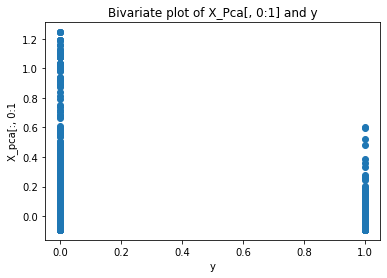

In [ ]:
#Bivariate plot of X_Pca[, 0:1] and y
plt.scatter(x=y, y=X_pca[ :,0:1])
plt.title('Bivariate plot of X_Pca[, 0:1] and y')
plt.xlabel('y')
plt.ylabel('X_pca[:, 0:1')
plt.show()

The above visualization is abivariate relationship between the labels and the first features column. from the visualization there's no bivariate relationship between the labels and the first reduced column of the features.

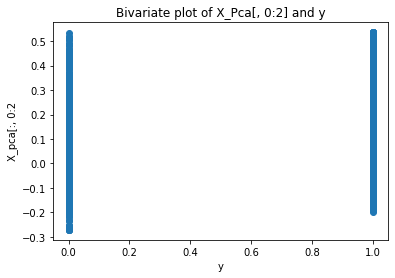

In [ ]:
#Bivariate plot of X_Pca[, 1:2] and y
plt.scatter(x=y, y=X_pca[ :,1:2])
plt.title('Bivariate plot of X_Pca[, 0:2] and y')
plt.xlabel('y')
plt.ylabel('X_pca[:, 0:2')
plt.show()

The above visualization is abivariate relationship between the labels and the second features column. From the visualization there's no bivariate relationship between the labels and the second reduced column of the features.

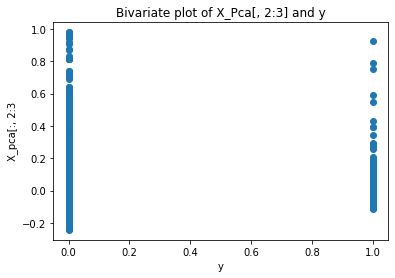

In [ ]:
#Bivariate plot of X_Pca[, 2:3] and y
plt.scatter(x=y, y=X_pca[ :,2:3])
plt.title('Bivariate plot of X_Pca[, 2:3] and y')
plt.xlabel('y')
plt.ylabel('X_pca[:, 2:3')
plt.show()

The above visualization is abivariate relationship between the labels and the second features column. From the visualization there's no bivariate relationship between the labels and the second reduced column of the features.

# 7. Implementing the solution.

In [ ]:
#Since the the features are continous the solution will be implemented by
#GaussianNB.

#Split the the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_pca, y, test_size=0.20, random_state=75)

The data is splitted into 80% for the training of the model algorithm and 20% for the test of the model algorithm.

In [ ]:
#Train the model
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

The model is trained using Gaussian Naive Bayes classifiers since the features of the data are continous data.

In [ ]:
#Prediction
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

Test the performance of the model by passing the test set of the data through it .

In [ ]:
#Model evaluation
from sklearn.metrics import confusion_matrix

print("Accuracy score", np.mean(y_pred==y_test))
print(confusion_matrix(y_test, y_pred))

Accuracy score 0.4989130434782609
[[111 448]
 [ 13 348]]


The model classffy's the email as sperm or not with accuracy score of 50%. from the test data the model is able to classiffy correctly 111 emails as spam email, 13 emails incorectly classified as spam email, 348 email correctly classified as not sperm email and 448 email incorrectly classified  as not sperm email.

# 8. challenge the solution.

The model accuracy score is 50% compared to the set metric of success which is 70% accuracy. These pose a challenge on the capability of the model to accurately classfy the emails as spam or not, when applied on real data.

# 9.Follow up question.

## a) Do we have the right data?

Yes, since the data had correct labels and features.

## b) Do we need another data to answer our question

No, the data was appropeiate since it had enough number of features and records.

## c) Do we have the right question.

Yes, the question was clear and straight to the point.